In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle


In [4]:
boston = load_boston()
bos = pd.DataFrame(boston.data,columns=boston.feature_names)

In [5]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [10]:
#showing all the keys avalilable
bos.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [11]:
#printing data set keys DESCR which gives us a discription about data
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [12]:
#given that Median Value (attribute 14) is usually the target.so make a target
bos['target']=boston.target

In [13]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [55]:
#nus=bos.rename(columns={'LSTAT':'lstat','RM':'rm'})

In [14]:
#checking missing values
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

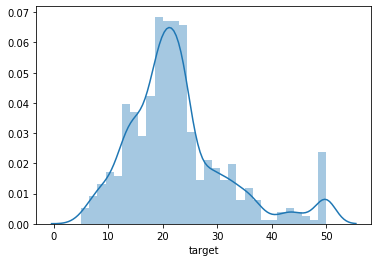

In [15]:
sns.distplot(bos['target'], bins=30)
plt.show()

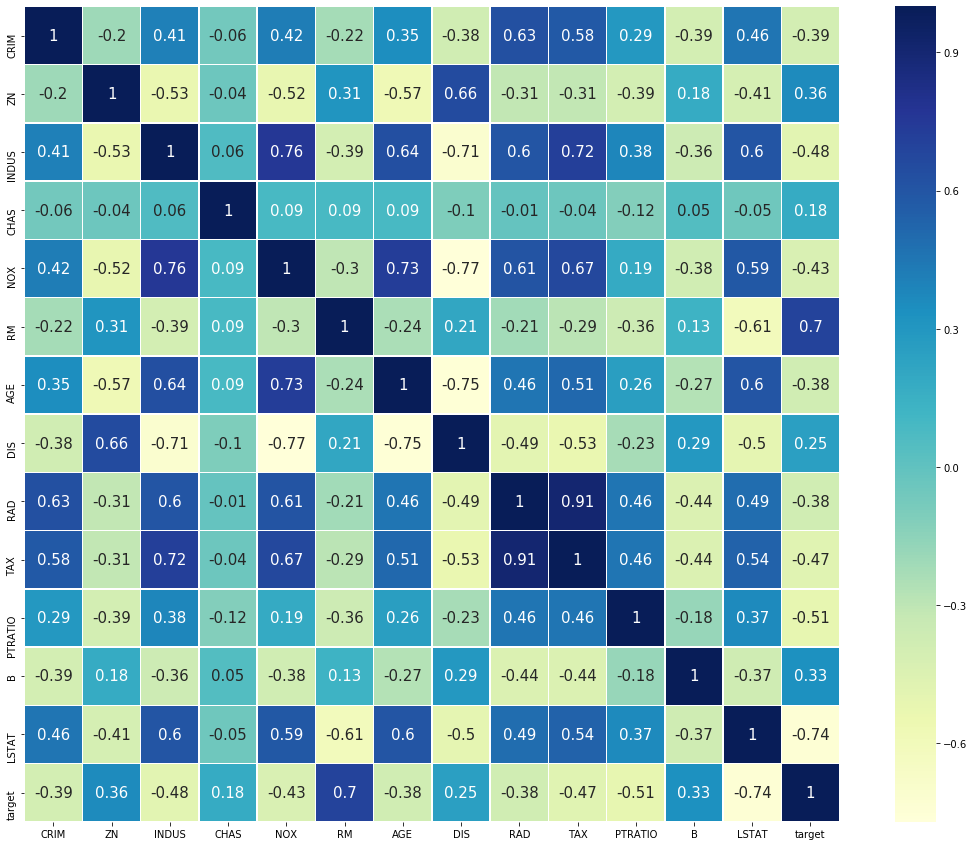

In [17]:
plt.figure(figsize=(20,15))
corr_mat= bos.corr().round(2)
ax=plt.subplot(111)
sns.heatmap(data=corr_mat,annot=True,linewidths=.5,cmap="YlGnBu",square=True,annot_kws={"size": 15},ax=ax)


RAD and TAX are highly correlated , so we don't include this in our features together to avoid multi-colinearity
From the above coorelation plot we can see that target  is strongly correlated to LSTAT, RM

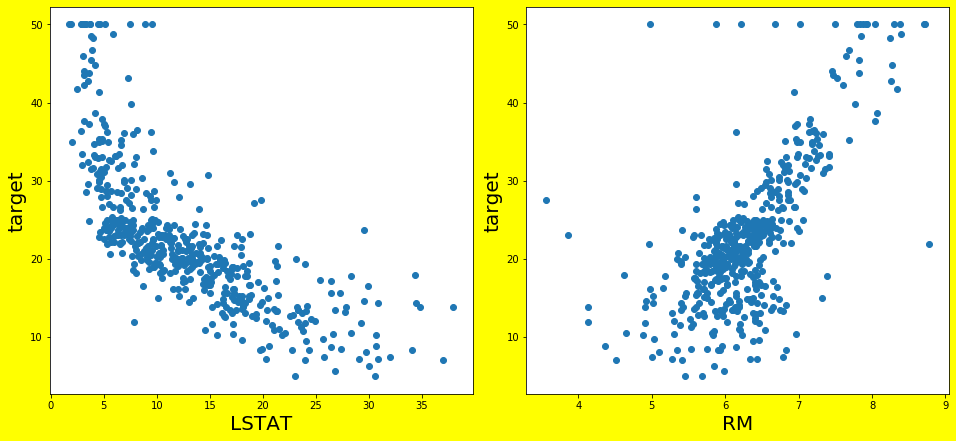

In [19]:
plt.figure(figsize=(20,30), facecolor='yellow')
plotnumber = 1
features=bos[['LSTAT', 'RM']]
target= bos['target']


for column in features:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(features[column],target)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('target',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [20]:
X = pd.DataFrame(np.c_[bos['LSTAT'], bos['RM']], columns = ['LSTAT','RM'])
Y=bos['target']


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=5)


In [24]:
print("shape of x_train:",X_train.shape,"\n","shape of y_train:",Y_train.shape,"\n","shape of x_test:",X_test.shape,"\n","shape of Y_test:",Y_test.shape)


shape of x_train: (379, 2) 
 shape of y_train: (379,) 
 shape of x_test: (127, 2) 
 shape of Y_test: (127,)


In [25]:
lin_mod=LinearRegression()
lin_mod.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
lin_mod.score(X_train,Y_train)

0.6405777809852186

In [31]:
lin_mod.score(X_test,Y_test)

0.6293654638684301

In [26]:
print("intercept:",lin_mod.intercept_)
print("cofficient:",lin_mod.coef_)

intercept: 0.18582215623609244
cofficient: [-0.67758923  4.91580979]


In [27]:
Y_train_predict =lin_mod.predict(X_train)
# root mean square error of the model
rmse_train = (np.sqrt(mean_squared_error(Y_train, Y_train_predict)))

# r-squared score of the model
r2_train= r2_score(Y_train, Y_train_predict)
print("r2 value for train dataset:",r2_train,"\n","RMSE value for train dataset:",rmse_train)

r2 value for train dataset: 0.6405777809852186 
 RMSE value for train dataset: 5.526318132474909


In [28]:
Y_test_predict = lin_mod.predict(X_test)
# root mean square error of the model
rmse_test= (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))

# r-squared score of the model
r2_test= r2_score(Y_test, Y_test_predict)
print("r2 value for test datase:",r2_test,"\n","RMSE value for test datase",rmse_test)

r2 value for test datase: 0.6293654638684301 
 RMSE value for test datase 5.531063432513127


In [29]:
# saving the model to the local file system
filename = 'new_bos.pickle'
pickle.dump(lin_mod, open(filename, 'wb'))